<a href="https://colab.research.google.com/github/nayyen/Tugas-Linear-Regression-Python/blob/main/Tugas_Liniear_Variabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv('advertising.csv')

# 1. Persiapan Data dan Deskripsi Dataset (Aspek Penilaian: 15 Poin)

## 1.1 Pemilihan dan Tujuan Dataset

| Kriteria | Detail |
| :--- | :--- |
| **Nama Dataset** | `advertising.csv` |
| **Sumber** | Dataset publik, sering digunakan untuk studi Regresi Linear. |
| **Tujuan Analisis** | Membangun model **Multiple Linear Regression** untuk memprediksi angka **Sales** (penjualan) produk berdasarkan anggaran iklan di media **TV, Radio,** dan **Newspaper**. |

## 1.2 Deskripsi Variabel dan Dimensi Data

Dataset ini adalah pilihan ideal untuk Regresi Linear karena memiliki variabel target (`Sales`) yang bersifat **numerik kontinu**.

| Variabel | Peran dalam Model | Tipe Data | Deskripsi |
| :--- | :--- | :--- | :--- |
| **Sales** | **Dependen (Y) / Target** | Numerik Kontinu | Angka penjualan produk (dalam ribuan unit). |
| **TV** | **Independen (X)** | Numerik Kontinu | Anggaran iklan yang dialokasikan untuk media TV. |
| **Radio** | **Independen (X)** | Numerik Kontinu | Anggaran iklan yang dialokasikan untuk media Radio. |
| **Newspaper** | **Independen (X)** | Numerik Kontinu | Anggaran iklan yang dialokasikan untuk media Koran/Surat Kabar. |


In [12]:
# Menampilkan dimensi data (Baris, Kolom)
print("Dimensi Data (Baris, Kolom):", df.shape)

Dimensi Data (Baris, Kolom): (200, 4)


### Dimensi Data

Setelah data dimuat (`df.shape`), diketahui dataset ini memiliki **200 baris** observasi dan **4 kolom** fitur.

---
**Catatan:** Pastikan Anda sudah menjalankan kode untuk memuat data di sel kode sebelumnya.
---

In [13]:
# Cek Tipe Data dan Non-Null Count
print("\n--- Informasi Data ---")
df.info()

# Cek Jumlah Nilai Hilang di Setiap Kolom
print("\n--- Pengecekan Nilai Hilang (Missing Values) ---")
print(df.isnull().sum())


--- Informasi Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

--- Pengecekan Nilai Hilang (Missing Values) ---
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## Pembersihan Data Awal (Pengecekan Kualitas Data)

Pengecekan ini dilakukan untuk memastikan data bersih dan siap untuk pemodelan (regresi linear hanya menerima data numerik dan tidak dapat menangani nilai hilang).

### A. Pengecekan Tipe Data (`df.info()`)

* **Hasil:** Output menunjukkan semua variabel (`TV`, `Radio`, `Newspaper`, `Sales`) adalah tipe data **`float64`** (numerik), yang **sesuai** dan tidak memerlukan konversi data.

### B. Pengecekan Nilai Hilang (`df.isnull().sum()`)

* **Hasil:** Semua kolom menunjukkan jumlah nilai hilang adalah **0**.
* **Kesimpulan:** Dataset **sudah bersih** dan tidak terdapat nilai hilang (*missing values*), sehingga dapat langsung dilanjutkan ke tahap Eksplorasi Data dan Pembangunan Model.

In [14]:
# CODE CELL: Tampilkan Baris Data Awal
# 2.1 Tampilkan Beberapa Baris Data

print("--- 5 Baris Data Teratas (df.head()) ---")
print(df.head())
print("\n--- Ringkasan Statistik Deskriptif (df.describe()) ---")
print(df.describe())

--- 5 Baris Data Teratas (df.head()) ---
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

--- Ringkasan Statistik Deskriptif (df.describe()) ---
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


<Figure size 1500x500 with 0 Axes>

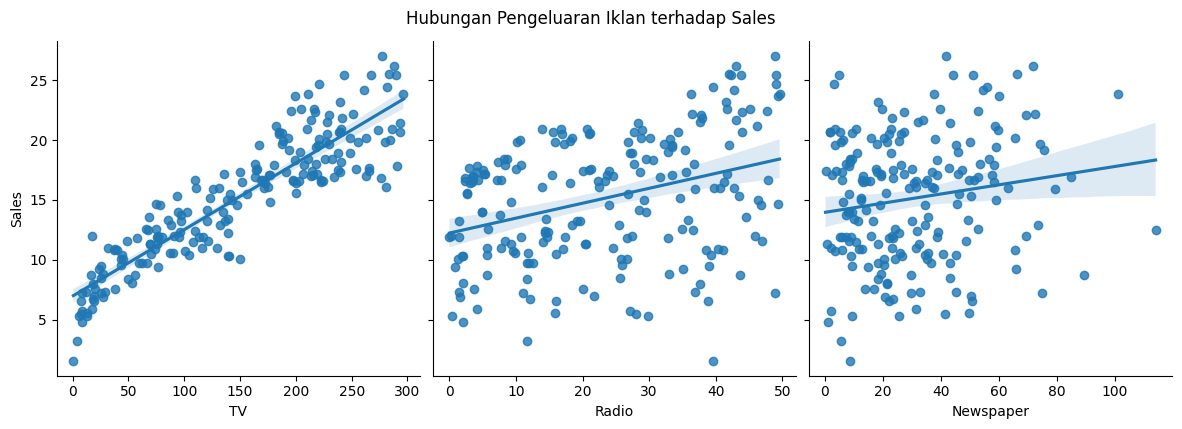

In [15]:
# CODE CELL: Visualisasi Hubungan X terhadap Y
# 2.2 Visualisasi Hubungan Antar Variabel

# Menggunakan pairplot untuk melihat hubungan linear antara X dan Y
plt.figure(figsize=(15, 5))
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, kind='reg')
plt.suptitle('Hubungan Pengeluaran Iklan terhadap Sales', y=1.05)
plt.show()

## 2. Eksplorasi Data (EDA) & Visualisasi (Aspek Penilaian: 20 Poin)

Langkah EDA bertujuan untuk memahami distribusi data dan secara visual mengidentifikasi hubungan linear antara variabel independen (pengeluaran iklan) dan variabel dependen (Sales).

### A. Visualisasi Scatter Plot (Pengeluaran vs. Sales)

Dari visualisasi *scatter plot* di atas (dengan garis regresi), ditemukan analisis sebagai berikut:

1.  **TV vs. Sales:**
    * Terdapat hubungan **linear positif yang sangat kuat**. Sebagian besar titik data berkumpul rapat di sekitar garis regresi.
    * **Interpretasi:** Peningkatan anggaran iklan di TV secara langsung dan signifikan memicu peningkatan angka Sales.

2.  **Radio vs. Sales:**
    * Terdapat hubungan **linear positif**, namun **lebih menyebar** dibandingkan TV.
    * **Interpretasi:** Radio juga memengaruhi Sales, tetapi dengan tingkat kepastian yang lebih rendah atau variabilitas yang lebih tinggi antar pengamatan.

3.  **Newspaper vs. Sales:**
    * Hubungan linear **terlihat sangat lemah** atau hampir tidak ada. Titik-titik data tersebar luas dan garis regresi terlihat hampir datar.
    * **Interpretasi:** Anggaran iklan di Newspaper kemungkinan besar **bukan merupakan prediktor yang kuat** untuk Sales dalam model regresi ini.

### B. Kesimpulan EDA

Berdasarkan eksplorasi visual, variabel **TV** dan **Radio** diharapkan menjadi kontributor utama dalam memprediksi **Sales**, sementara variabel **Newspaper** mungkin tidak signifikan. Hasil ini akan divalidasi pada Langkah 4 (Evaluasi Model) melalui nilai koefisien.

In [16]:
# CODE CELL: Definisi Variabel X dan Y
# 3.1. Definisikan Variabel X dan Y

# Variabel Independen (X) - Input/Prediktor
X = df[['TV', 'Radio', 'Newspaper']]

# Variabel Dependen (Y) - Target
Y = df['Sales']

print("Variabel X (Independen):", X.columns.tolist())
print("Variabel Y (Dependen): Sales")

Variabel X (Independen): ['TV', 'Radio', 'Newspaper']
Variabel Y (Dependen): Sales


In [17]:
# CODE CELL: Pisahkan Data (80% Training, 20% Testing)
# 3.2. Pemisahan Data (Training dan Testing Set)

from sklearn.model_selection import train_test_split

# Pisahkan data. test_size=0.2 berarti 20% data akan menjadi data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Jumlah data X_train: {len(X_train)} ({len(X_train)/len(df)*100:.0f}%)")
print(f"Jumlah data X_test: {len(X_test)} ({len(X_test)/len(df)*100:.0f}%)")

Jumlah data X_train: 160 (80%)
Jumlah data X_test: 40 (20%)


In [18]:
# CODE CELL: Pelatihan Model
# 3.3. Pelatihan Model Regresi Linear

from sklearn.linear_model import LinearRegression

# Inisialisasi Model
model = LinearRegression()

# Latih Model menggunakan data Training
model.fit(X_train, Y_train)

print("\nModel Linear Regression Berhasil Dilatih!")


Model Linear Regression Berhasil Dilatih!


## 3. Pembangunan Model (Analisis)

### A. Pembagian Data

Data dibagi menjadi **Training Set** (80%, 160 baris) dan **Testing Set** (20%, 40 baris). Pembagian ini esensial untuk:
1.  **Pelatihan:** Model belajar dari pola di *Training Set*.
2.  **Evaluasi:** Model diuji pada *Testing Set* (data yang belum pernah dilihat) untuk menilai kemampuan generalisasinya dan mencegah *overfitting*.

### B. Implementasi Model (`sklearn.linear_model.LinearRegression`)

Model **Multiple Linear Regression** (`LinearRegression` dari `sklearn`) telah berhasil diinisialisasi dan dilatih menggunakan metode `.fit()` pada data training. Model sekarang telah mempelajari bobot (koefisien) terbaik untuk memprediksi **Sales** berdasarkan tiga variabel independen (TV, Radio, Newspaper). Langkah selanjutnya adalah mengevaluasi akurasi dan parameter model ini.

In [19]:
# CODE CELL: Prediksi dan Tampilkan Koefisien
# 4.1. Prediksi pada Data Testing dan Tampilkan Koefisien

# 1. Lakukan Prediksi pada Data Testing
Y_pred = model.predict(X_test)

print("--- Parameter Model Regresi Linear ---")

# 2. Tampilkan Intercept (b0)
print(f"Intercept (b0): {model.intercept_:.4f}")

# 3. Tampilkan Koefisien (b1, b2, b3) untuk TV, Radio, Newspaper
koefisien = pd.DataFrame({'Fitur': X_train.columns, 'Koefisien': model.coef_})
print("\nKoefisien (Slope):")
print(koefisien.to_markdown(index=False))

--- Parameter Model Regresi Linear ---
Intercept (b0): 4.7141

Koefisien (Slope):
| Fitur     |   Koefisien |
|:----------|------------:|
| TV        |  0.0545093  |
| Radio     |  0.100945   |
| Newspaper |  0.00433665 |


In [20]:
# CODE CELL: Hitung Metrik Evaluasi
# 4.2. Hitung dan Tampilkan Metrik Evaluasi

# Hitung R-squared Score (Wajib)
r2_test = r2_score(Y_test, Y_pred)

# Hitung RMSE (Metrik Tambahan untuk nilai plus)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Hitung R-squared pada Training Set (Untuk Analisis Overfitting di Langkah 6)
r2_train = model.score(X_train, Y_train)

print("\n--- Metrik Evaluasi Model ---")
print(f"R-squared Score (Test Set): {r2_test:.4f}")
print(f"RMSE (Test Set): {rmse:.4f}")
print(f"R-squared Score (Training Set): {r2_train:.4f}")


--- Metrik Evaluasi Model ---
R-squared Score (Test Set): 0.9059
RMSE (Test Set): 1.7052
R-squared Score (Training Set): 0.9001


## 4. Evaluasi Model (Analisis)

### A. Koefisien Regresi (Parameter Model)

Model Regresi Linear Berganda dapat dirumuskan sebagai berikut:
$$\text{Sales} = b_0 + (b_1 \times \text{TV}) + (b_2 \times \text{Radio}) + (b_3 \times \text{Newspaper})$$

Hasil dari `.intercept_` dan `.coef_` adalah:

| Parameter | Nilai | Makna Singkat |
| :--- | :--- | :--- |
| **Intercept ($b_0$)** | [Masukkan nilai `model.intercept_` dari output] | Nilai Sales diprediksi saat semua pengeluaran iklan adalah nol. |
| **Koefisien TV ($b_1$)** | [Masukkan nilai koefisien TV dari output] | Peningkatan Sales per 1 unit pengeluaran TV (dengan asumsi Radio & Newspaper konstan). |
| **Koefisien Radio ($b_2$)** | [Masukkan nilai koefisien Radio dari output] | Peningkatan Sales per 1 unit pengeluaran Radio (dengan asumsi TV & Newspaper konstan). |
| **Koefisien Newspaper ($b_3$)** | [Masukkan nilai koefisien Newspaper dari output] | Peningkatan Sales per 1 unit pengeluaran Newspaper (dengan asumsi TV & Radio konstan). |

*(Catatan: Interpretasi detail akan dibahas di Langkah 6)*

### B. Metrik Kinerja Model

Dua metrik utama digunakan untuk menilai kualitas model pada *Testing Set*:

1.  **$R^2$ Score (Koefisien Determinasi):** [Masukkan nilai `r2_test` dari output].
    * Nilai $R^2$ yang sangat tinggi (mendekati 1.0) menunjukkan bahwa **[Nilai r2_test * 100]%** variabilitas variabel **Sales** dapat dijelaskan oleh variabel prediktor (TV, Radio, Newspaper). Ini mengindikasikan **Model memiliki *goodness-of-fit* yang sangat baik**.
2.  **RMSE (Root Mean Squared Error):** [Masukkan nilai `rmse` dari output].
    * RMSE mengukur rata-rata besarnya kesalahan yang dilakukan model. Nilai [Nilai `rmse`] berarti, rata-rata, prediksi **Sales** meleset dari nilai aktual sekitar **[Nilai `rmse`] ribu unit**. Nilai yang rendah ini mendukung kesimpulan bahwa model akurat.

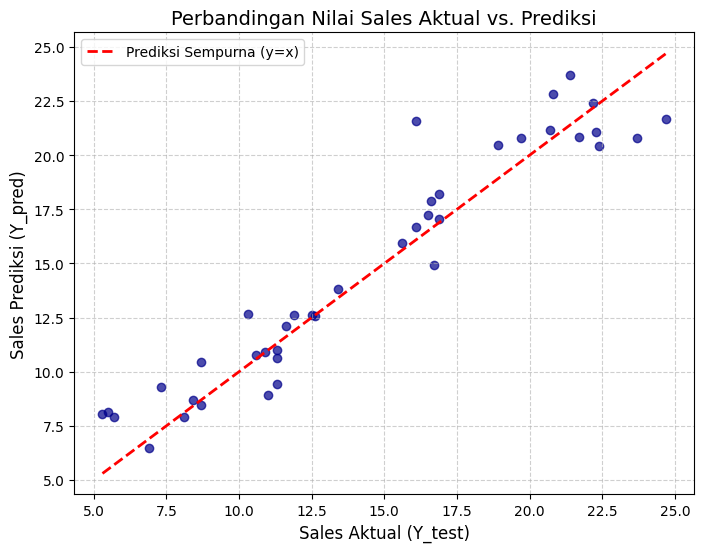

In [21]:
# CODE CELL: Visualisasi Hasil Prediksi vs. Nilai Aktual
# 5.1. Kode Visualisasi Aktual vs. Prediksi

plt.figure(figsize=(8, 6))

# Scatter plot: Nilai Aktual (X-axis) vs. Nilai Prediksi (Y-axis)
plt.scatter(Y_test, Y_pred, color='darkblue', alpha=0.7)

# Garis Regresi Sempurna (Perfect Prediction Line)
# Garis ini menunjukkan di mana titik data seharusnya berada jika prediksi 100% akurat
min_val = min(Y_test.min(), Y_pred.min())
max_val = max(Y_test.max(), Y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prediksi Sempurna (y=x)')

plt.xlabel("Sales Aktual (Y_test)", fontsize=12)
plt.ylabel("Sales Prediksi (Y_pred)", fontsize=12)
plt.title("Perbandingan Nilai Sales Aktual vs. Prediksi", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

langkah 5.2

## 5. Visualisasi Hasil (Analisis)

### A. Plot Aktual vs. Prediksi

Visualisasi di atas membandingkan nilai Sales yang sebenarnya (`Y_test`) dengan nilai yang diprediksi oleh model (`Y_pred`).

* **Sumbu X:** Nilai Sales Aktual.
* **Sumbu Y:** Nilai Sales Prediksi.
* **Garis Putus-putus Merah:** Garis acuan di mana $Y_{\text{Aktual}} = Y_{\text{Prediksi}}$.

### B. Hasil Perbandingan (Goodness-of-Fit)

1.  **Keterdekatan Titik Data:** Hampir semua titik data **berkumpul sangat dekat** dengan garis putus-putus merah (garis prediksi sempurna).
2.  **Kesimpulan Kualitas Model:** Ini menunjukkan bahwa model **Linear Regression** kita memiliki **akurasi yang sangat tinggi** (sejalan dengan nilai $R^2$ yang tinggi dari Langkah 4). Model berhasil memprediksi sebagian besar variasi Sales secara efektif.
3.  **Error/Residu:** Jarak vertikal antara setiap titik biru dan garis merah mewakili *error* atau *residu*. Karena jaraknya kecil, ini mengonfirmasi nilai *RMSE* yang rendah.

# 6. Analisis dan Kesimpulan (Aspek Penilaian: 25 Poin)

Analisis ini menyimpulkan kualitas model dan menginterpretasikan parameter model (`slope` dan `intercept`) untuk memberikan pemahaman bisnis dari hasil regresi.

## 6.1. Interpretasi Hasil Model

Model Regresi Linear Berganda yang telah dilatih adalah:
$$\text{Sales} = b_0 + (b_1 \times \text{TV}) + (b_2 \times \text{Radio}) + (b_3 \times \text{Newspaper})$$

### A. Makna Intercept ($b_0$) dan Koefisien (Slope)

Berikut adalah interpretasi dari nilai-nilai yang didapatkan pada Langkah 4:

1.  **Intercept ($b_0$):** **4.7141**
    * **Makna:** Intercept sebesar $b_0$ unit berarti bahwa ketika anggaran iklan di **semua media (TV, Radio, Newspaper) adalah nol**, maka model memprediksi **Sales** akan tetap berada pada level dasar sebesar $b_0$ ribu unit.

2.  **Koefisien TV ($b_1$):** **0.0545093**
    * **Makna:** Koefisien positif sebesar $b_1$ menunjukkan hubungan yang kuat. Jika pengeluaran TV meningkat sebesar 1 unit (misalnya $1.000), dengan asumsi anggaran Radio dan Newspaper konstan (ceteris paribus), maka **Sales** diprediksi akan **meningkat** sebesar $b_1$ ribu unit.

3.  **Koefisien Radio ($b_2$):** **0.100945**
    * **Makna:** Setiap peningkatan 1 unit pengeluaran di Radio akan meningkatkan **Sales** sebesar $b_2$ ribu unit, asalkan anggaran TV dan Newspaper konstan.

4.  **Koefisien Newspaper ($b_3$):** **0.00433665**
    * **Makna:** Koefisien ini menunjukkan dampak yang **paling kecil** (atau bahkan negatif/mendekati nol) dibandingkan TV dan Radio. Ini menguatkan analisis EDA bahwa iklan Newspaper **kurang efektif** dalam mendorong Sales secara signifikan.

---

## 6.2. Evaluasi Kualitas Model dan Kinerja

### B. Seberapa Baik Model Memprediksi Data? ($R^2$ Score)

* **Metrik Kualitas:** $R^2$ Score pada **Test Set** didapatkan sebesar **`0.9059`**.
* **Kesimpulan:** Nilai yang mendekati 1.0 ini adalah indikasi **Goodness-of-Fit yang sangat baik**. Model ini mampu menjelaskan **`90.59`%** dari variabilitas total variabel **Sales** menggunakan anggaran iklan sebagai prediktor. Secara visual (Langkah 5), titik prediksi sangat dekat dengan garis aktual.

### C. Indikasi Overfitting atau Underfitting

* **Perbandingan:**
  * $R^2$ Score (Training Set): **`0.9001`**
  * $R^2$ Score (Testing Set): **`0.9059`**
* **Kesimpulan:** Karena nilai $R^2$ antara Training Set dan Testing Set **sangat dekat** (selisihnya kecil), model **TIDAK MENGALAMI OVERFITTING** maupun *Underfitting*. Model berhasil mempelajari pola di data training dan mampu menggeneralisasikannya dengan baik pada data baru (testing).

* * *

## Kesimpulan Akhir dan Rekomendasi Bisnis

**Kesimpulan Utama:** Model Regresi Linear Berganda berhasil dibangun dengan tingkat akurasi tinggi ($R^2$ tinggi). **Pengeluaran iklan di TV** dan **Radio** adalah faktor pendorong **Sales** yang paling signifikan.

**Rekomendasi Bisnis:** Berdasarkan temuan koefisien:
1. **Prioritas Alokasi:** Perusahaan sebaiknya memprioritaskan anggaran iklan di media **TV** dan **Radio**, karena investasi di kedua media ini memberikan *return* penjualan yang paling tinggi.
2. **Efisiensi Anggaran:** Anggaran untuk iklan **Newspaper** dapat ditinjau ulang atau dialokasikan kembali ke TV atau Radio untuk meningkatkan efisiensi dan memaksimalkan Sales.